In [1]:
## Import Modules
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MDAnalysis as mda
sys.path.append("../Scripts/")
from icecoder import IceCoder

In [7]:
## The trajectory of interest loaded into MDAnalysis..
u = mda.Universe("../data/pbc_mol.gro",
                 "../data/pbc_mol.xtc")

In [9]:
### Calling icecoder..
ic = IceCoder()
### Calculating features from MDAnalysis universe..
ic.featurizer(mda_universe=u, stop = 501,step = 10, mode = "aggressive")
## Projecting into latent variable space of VAE
ic.project()

  0%|          | 0/51 [00:00<?, ?it/s]

In [5]:
## Styles
from utility import Ticker
plt.style.use("style.txt")
plt.rcParams['font.family'] = 'C059'

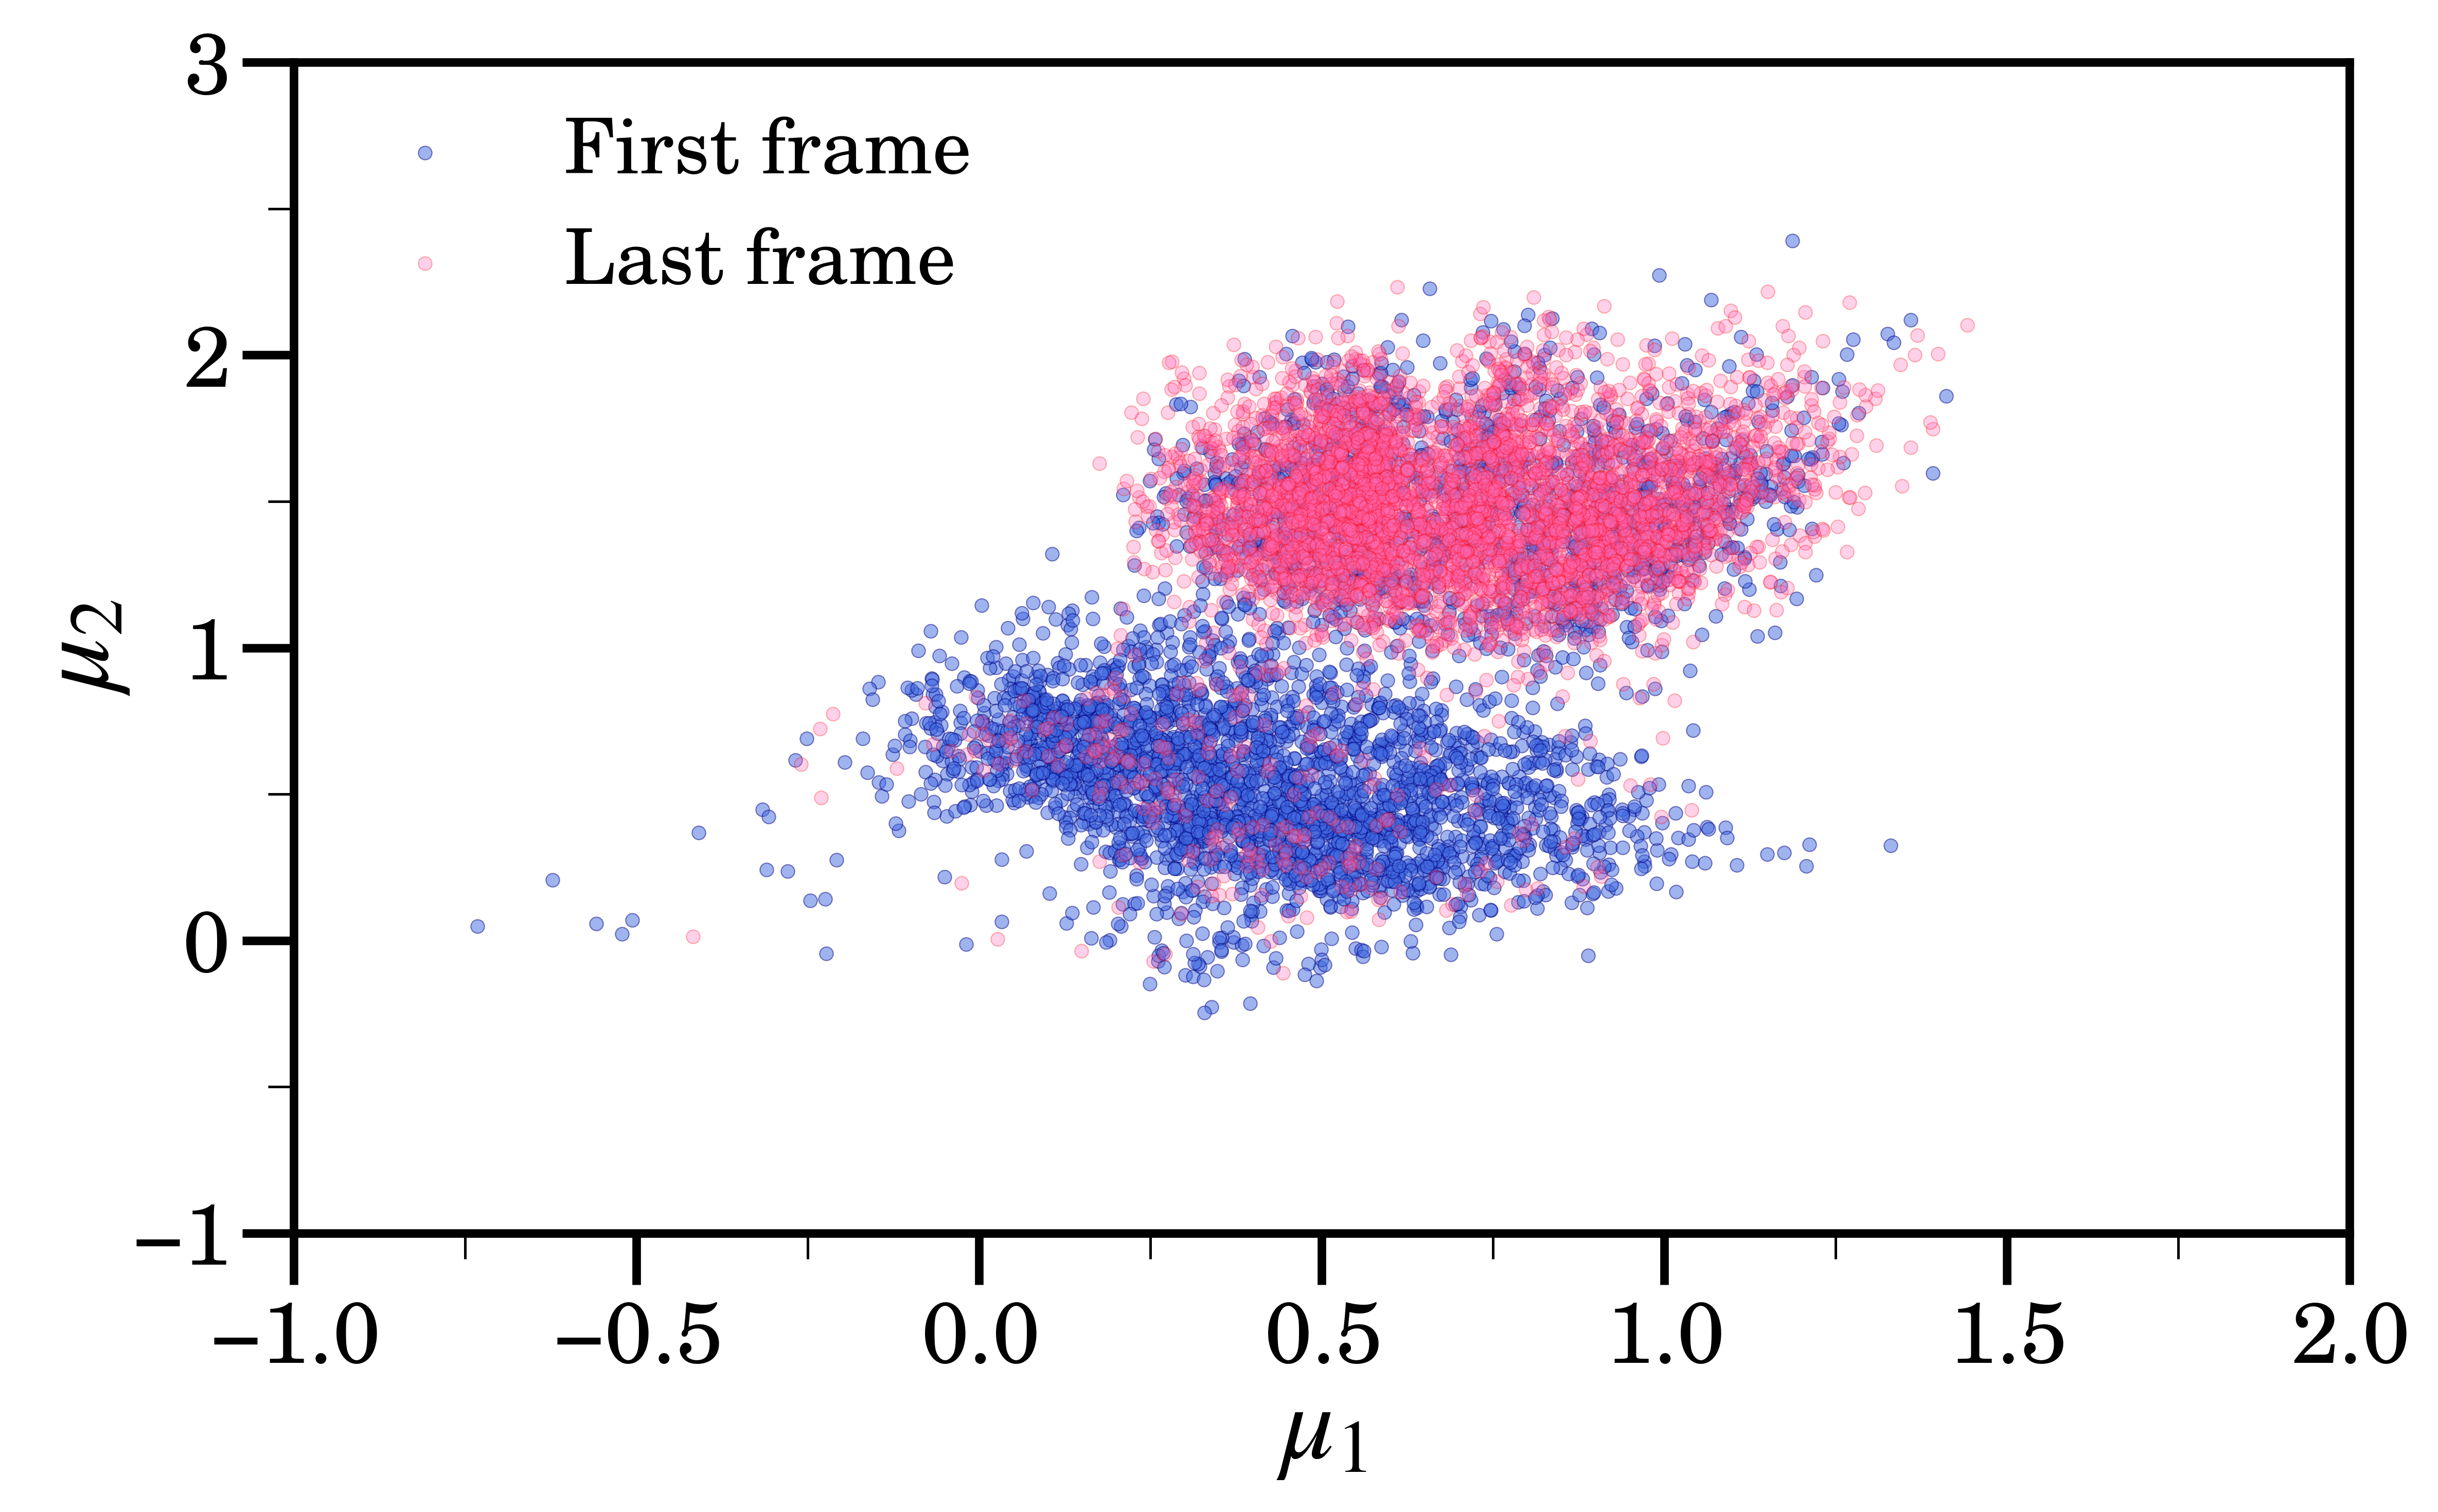

In [6]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 600)
# First frame
sns.scatterplot(x = ic.projected[:,0][:4441], y = ic.projected[:,1][:4441],s = 10, alpha = 0.5, 
                c = "royalblue",edgecolor = "navy", label = "First frame")
# Last frame
sns.scatterplot(x = ic.projected[:,0][-4441:], y = ic.projected[:,1][-4441:],s = 10, alpha = 0.3, 
                c = "hotpink", edgecolor = "r", label = "Last frame")
plt.legend(fontsize = 18)
plt.xlabel(r"$\mu_1$", fontsize = 25)
plt.ylabel(r"$\mu_2$", fontsize = 25)
Ticker(ax)
fig.tight_layout()

In [6]:
## Predicting ice phases...
ic.predict()